In [2]:
import urllib.request

from bs4 import BeautifulSoup

def printTable(data, header):
    print("{:<40} {:<8} {:<30} {:<40}".format(header[0][:-1], header[1][:-1], header[2][:-1], header[3][:-1]))
    print('')
    for row in data:
        l=[]
        for r in row[0:4]:
            if '\n' in r:
                r=r[:-1]
            l.append(r)
        print("{:<40} {:<8} {:<30} {:<40}".format(l[0], l[1], l[2], l[3]))

URL = 'https://en.wikipedia.org/wiki/Julia_Roberts_filmography'
html = '';

with urllib.request.urlopen(URL) as response:
    html = response.read()

data = []

soup = BeautifulSoup(html, "html.parser")

# find right table in page
table = soup.find('table', attrs={'class':'wikitable plainrowheaders sortable'})
rows = table.findAll('tr')
info =[]
header = []

for th in rows[0].findAll("th"):
    header.append(th.findNext(text=True))

# get movies info
for tr in rows[1:]:
    row = []
    row.append(tr.find("th").findNext(text=True))
    for td in tr.findAll("td"):
        row.append(td.findNext(text=True))
    info.append(row)
    
printTable(info, header)

Title                                    Year     Role                           Director(s)                             

Firehouse                                1987     Babs                           J. Christian Ingvordsen                 
Satisfaction                             1988     Daryle Shane                   Joan Freeman                            
Mystic Pizza                             1988     Daisy Arujo                    Donald Petrie                           
Blood Red                                1989     Marisa Collogero               Peter Masterson                         
Steel Magnolias                          1989     Shelby Eatenton Latcherie      Herbert Ross                            
Pretty Woman                             1990     Vivian Ward                    Garry Marshall                          
Flatliners                               1990     Rachel Mannus                  Joel Schumacher                         
Sleeping with the Enemy

In [ ]:
Question 2

In [3]:
import re
import urllib.request
from urllib.request import urlopen
from bs4 import BeautifulSoup

def printTable(data):
    print("{:<4} {:<40} {:<15} {:<30} {:<3}".format('#','Name', 'Year of birth', 'Country of birth', 'Awards'))
    print('')
    i=1
    for row in data:
        print("{:<4} {:<30} {:<15} {:<30} {:<3}".format(i, row[0], row[1], row[2], row[3]))
        i += 1

# returns a list of all the co-actors' page links
def getCoActor(html):
    wikiUrl='https://en.wikipedia.org'
    url = 'https://en.wikipedia.org'+html
    curr_movie_html=''
    with urllib.request.urlopen('https://en.wikipedia.org'+html) as response:
        curr_movie_html = response.read()
    curr_movie_html = BeautifulSoup(curr_movie_html, "html.parser") #"html.parser"
    header = curr_movie_html.find("span", class_="mw-headline", text=re.compile('(Cast)|(cast)'))
    actors_hyperLinks = []
    if header:
        parent = header.parent
        cast_data = parent.findNext(["ul", "table"])
        if cast_data.name == 'ul':
            for li in cast_data.findAll('li'):
                link = li.find('a')
                name = li.find(text=True)
                if not re.match("Julia Roberts", name) and link:
                    link = 'https://en.wikipedia.org'+link.get("href")
                    actors_hyperLinks.append(link)
        else:
            rows = cast_data.findAll('tr')
            for tr in rows[1:]:
                cell = tr.find("td")
                link = cell.find('a', href=True)
                name = cell.find(text=True)
                if not re.match("Julia Roberts", name) and link:
                    actors_hyperLinks.append(wikiUrl+link['href'])
    return actors_hyperLinks



URL = 'https://en.wikipedia.org/wiki/Julia_Roberts_filmography'
html = ''
with urllib.request.urlopen(URL) as response:
    html = response.read()

soup = BeautifulSoup(html, "html.parser")
table = soup.find('table', attrs={'class':'wikitable plainrowheaders sortable'})
rows = table.findAll('tr')
movies_hyperLinks = []
actors_links =[]
for tr in rows[1:]:
    for th in tr.findAll('th'):
        link = th.findAll("a")
        if len(link) > 0:
            movies_hyperLinks.append(link[0].get("href"))
for movie in movies_hyperLinks:
    arr = getCoActor(movie)
    for x in arr:
        actors_links.append(x)

# collect info about each co-actor
info =[]
for actor in actors_links:
    try:
        asoup = BeautifulSoup(urlopen(actor), "html.parser")
    except:
        continue

    name = asoup.find("h1", class_= "firstHeading").find(text=True)
    try:
        box = asoup.find("table", class_ = re.compile('infobox')).find("th",text = re.compile('Born')).parent
        try:
            bornYear = box.find("span",class_="bday").find(text=True)
        except:
            bornYear = '-'
        try:
            country = box.find("div",class_= "birthplace").findAll(text= True)[-1].replace(',','')
        except:
            country = '-'
    except:
        bornYear = '-'
        country = '-'

    awards = "https://en.wikipedia.org/wiki/List_of_awards_and_nominations_received_by_" + name.replace(' ', '_')
    try:
        aw_soup = BeautifulSoup(urlopen(awards), "html.parser")
        nawards = len(aw_soup.findAll("td", class_ = "yes table-yes2", text = re.compile('Won')))
    except:
        nawards = 0

    info.append([name, bornYear, country, nawards])

printTable(info)

#    Name                                     Year of birth   Country of birth               Awards

1    Peter Onorati                  1953-05-16       United States                 0  
2    Peter Mackenzie                1961-01-19       U.S.                          0  
3    Craig Mitchell (actor)         1964-04-22      Hempstead New York             0  
4    Justine Bateman                1966-02-19       U.S.                          0  
5    Liam Neeson                    1952-06-07      Northern Ireland               5  
6    Trini Alvarado                 1967-01-10       U.S.                          0  
7    Scott Coffey                   1964-05-01       U.S.                          0  
8    Britta Phillips                1963-06-11       U.S.                          0  
9    Debbie Harry                   1945-07-01       U.S.                          0  
10   Michael DeLorenzo              -               -                              0  
11   Tom O'Brien (actor)     

In [ ]:
Question 3

In [4]:
names_list = []
for row in info:
    names_list.append(row[0])

names_list.sort()

joint_movies = []

# count duplicates
curr = names_list[0]
count = 1
for a in names_list[1:]:
    if a == curr:
        count = count + 1
    else:
        joint_movies.append([curr, count])
        count = 1
        curr = a
joint_movies.append([curr, count])

# print table
print("{:<4} {:<40} {:<15}".format('#', 'Name', 'Num of joint movies'))
print('')
i=1
for r in joint_movies:
    print("{:<4} {:<40} {:<15}".format(i, r[0], r[1]))
    i += 1

#    Name                                     Num of joint movies

1    Aaron Eckhart                            1              
2    Aaron Yoo                                1              
3    Aasif Mandvi                             1              
4    Abigail Breslin                          2              
5    Adam Storke                              1              
6    Adrienne-Joi Johnson                     1              
7    Aharon Ipalé                             1              
8    Aidan Quinn                              1              
9    Al Ruscio                                1              
10   Alan Alda                                1              
11   Alan Arkin                               1              
12   Alan Rickman                             1              
13   Albert Finney                            1              
14   Aldo Ray                                 1              
15   Alex Hyde-White                          1              
16 

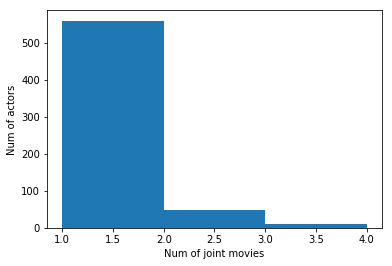

In [5]:
import matplotlib.pyplot as plt

joint_movies_num = []

# get only the number of joint movies, without the co-actors names
for m in joint_movies:
    joint_movies_num.append(m[1])

max_movies = max(joint_movies_num)

# the indexes of the list represent the number of joint movies, and the content represent the number of co-actors
actors_num = [0] * (max_movies + 1)

for n in joint_movies_num:
    actors_num[n] = actors_num[n] + 1

xAxis = []
yAxis = []
j = 0
for e in actors_num:
    if e > 0:
        xAxis.append(j)
        yAxis.append(e)
    j += 1

plt.hist(joint_movies_num, bins=xAxis)

plt.ylabel("Num of actors")
plt.xlabel("Num of joint movies")

plt.show()
